This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [18]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [19]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [20]:
train_labels[0]

1

In [21]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [22]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [23]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [24]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [25]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [26]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [27]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [28]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [29]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 7s 60ms/step - loss: 0.5474 - accuracy: 0.7817 - val_loss: 0.4275 - val_accuracy: 0.8564
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3490 - accuracy: 0.8897 - val_loss: 0.3426 - val_accuracy: 0.8660
Epoch 3/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2625 - accuracy: 0.9126 - val_loss: 0.2900 - val_accuracy: 0.8893
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2087 - accuracy: 0.9292 - val_loss: 0.2907 - val_accuracy: 0.8829
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1752 - accuracy: 0.9421 - val_loss: 0.2786 - val_accuracy: 0.8895
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1522 - accuracy: 0.9500 - val_loss: 0.2879 - val_accuracy: 0.8864
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1302 - accuracy: 0.9567 - val_loss: 0.2910 - val_accuracy: 0.8855
Epoch 8/20
30

In [30]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

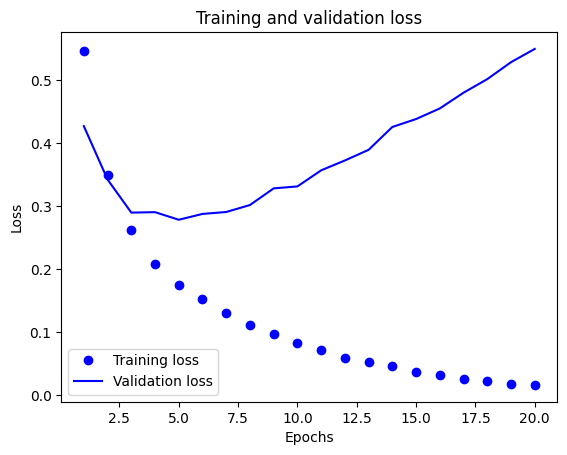

In [31]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

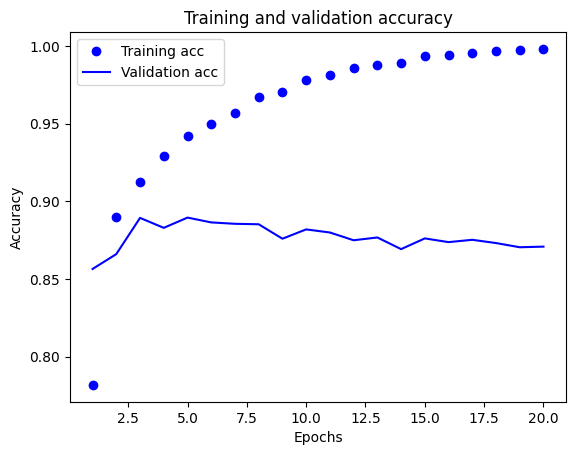

In [32]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [33]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 15ms/step - loss: 0.4561 - accuracy: 0.8222
Epoch 2/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2708 - accuracy: 0.9035
Epoch 3/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2100 - accuracy: 0.9240
Epoch 4/4
782/782 [==============================] - 3s 4ms/step - loss: 0.2864 - accuracy: 0.8861


In [34]:
results

[0.2864384651184082, 0.8860800266265869]

### Using a trained model to generate predictions on new data

In [35]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.17607535],
       [0.9995697 ],
       [0.84802556],
       ...,
       [0.12351548],
       [0.06137131],
       [0.5860114 ]], dtype=float32)

### Further experiments

In [36]:
from tensorflow import keras
from tensorflow.keras import layers

### 1 hidden layers
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


In [37]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [38]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [39]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 56ms/step - loss: 0.4965 - accuracy: 0.7983 - val_loss: 0.3924 - val_accuracy: 0.8587
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.3269 - accuracy: 0.8954 - val_loss: 0.3237 - val_accuracy: 0.8831
Epoch 3/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2613 - accuracy: 0.9134 - val_loss: 0.3012 - val_accuracy: 0.8821
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2206 - accuracy: 0.9293 - val_loss: 0.2823 - val_accuracy: 0.8890
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1936 - accuracy: 0.9395 - val_loss: 0.2895 - val_accuracy: 0.8835
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1723 - accuracy: 0.9469 - val_loss: 0.2906 - val_accuracy: 0.8833
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1556 - accuracy: 0.9523 - val_loss: 0.2875 - val_accuracy: 0.8834
Epoch 8/20
30

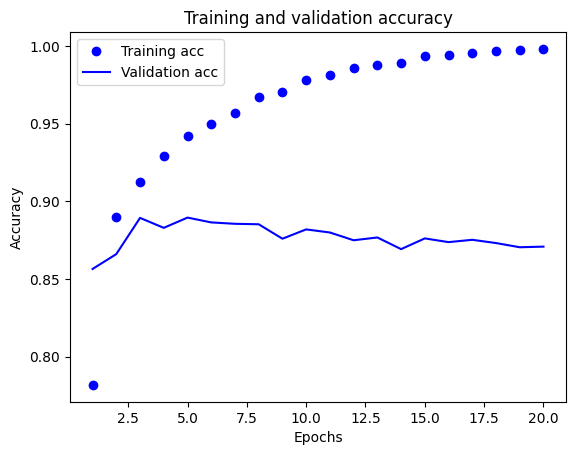

In [40]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Epoch 1/20
30/30 [==============================] - 3s 58ms/step - loss: 0.5498 - accuracy: 0.7605 - val_loss: 0.4350 - val_accuracy: 0.8339
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3312 - accuracy: 0.8949 - val_loss: 0.3271 - val_accuracy: 0.8739
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2382 - accuracy: 0.9217 - val_loss: 0.2820 - val_accuracy: 0.8891
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1868 - accuracy: 0.9358 - val_loss: 0.2793 - val_accuracy: 0.8884
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1561 - accuracy: 0.9490 - val_loss: 0.2820 - val_accuracy: 0.8881
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1243 - accuracy: 0.9605 - val_loss: 0.2948 - val_accuracy: 0.8839
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1055 - accuracy: 0.9677 - val_loss: 0.3431 - val_accuracy: 0.8726
Epoch 8/20
30

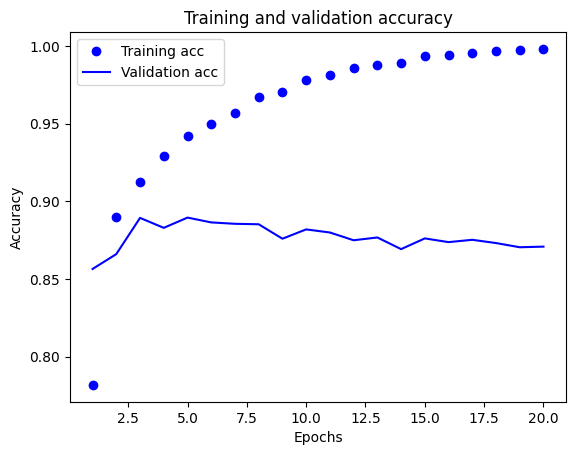

In [41]:
# 3 hidden layers.
model2 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Wrapping up

Epoch 1/20
30/30 [==============================] - 4s 65ms/step - loss: 0.5631 - accuracy: 0.7667 - val_loss: 0.4701 - val_accuracy: 0.8359
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3967 - accuracy: 0.8866 - val_loss: 0.3738 - val_accuracy: 0.8767
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3064 - accuracy: 0.9113 - val_loss: 0.3224 - val_accuracy: 0.8835
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2495 - accuracy: 0.9252 - val_loss: 0.3020 - val_accuracy: 0.8828
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2094 - accuracy: 0.9354 - val_loss: 0.2811 - val_accuracy: 0.8892
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1805 - accuracy: 0.9463 - val_loss: 0.2791 - val_accuracy: 0.8864
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1582 - accuracy: 0.9523 - val_loss: 0.2749 - val_accuracy: 0.8889
Epoch 8/20
30

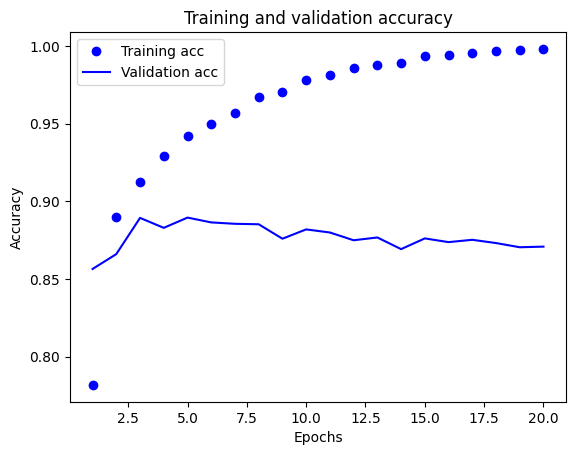

In [42]:
# fewer hidden units
model = keras.Sequential([
    layers.Dense(5, activation="relu"),
    layers.Dense(5, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Epoch 1/20
30/30 [==============================] - 3s 57ms/step - loss: 0.5280 - accuracy: 0.7385 - val_loss: 0.3696 - val_accuracy: 0.8544
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3126 - accuracy: 0.8801 - val_loss: 0.3637 - val_accuracy: 0.8446
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2399 - accuracy: 0.9076 - val_loss: 0.2973 - val_accuracy: 0.8804
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1956 - accuracy: 0.9245 - val_loss: 0.2882 - val_accuracy: 0.8840
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1544 - accuracy: 0.9425 - val_loss: 0.2830 - val_accuracy: 0.8866
Epoch 6/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1298 - accuracy: 0.9525 - val_loss: 0.3592 - val_accuracy: 0.8630
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0918 - accuracy: 0.9709 - val_loss: 0.3584 - val_accuracy: 0.8744
Epoch 8/20
30

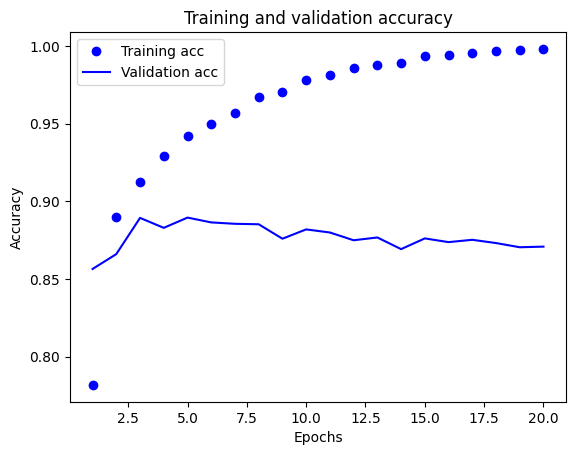

In [43]:
# more hidden units
model = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Epoch 1/13
30/30 [==============================] - 3s 57ms/step - loss: 0.1828 - accuracy: 0.7203 - val_loss: 0.1276 - val_accuracy: 0.8295
Epoch 2/13
30/30 [==============================] - 1s 26ms/step - loss: 0.1004 - accuracy: 0.8719 - val_loss: 0.1106 - val_accuracy: 0.8467
Epoch 3/13
30/30 [==============================] - 1s 24ms/step - loss: 0.0819 - accuracy: 0.8947 - val_loss: 0.1033 - val_accuracy: 0.8558
Epoch 4/13
30/30 [==============================] - 1s 25ms/step - loss: 0.0656 - accuracy: 0.9167 - val_loss: 0.0824 - val_accuracy: 0.8884
Epoch 5/13
30/30 [==============================] - 1s 25ms/step - loss: 0.0546 - accuracy: 0.9323 - val_loss: 0.0829 - val_accuracy: 0.8853
Epoch 6/13
30/30 [==============================] - 1s 36ms/step - loss: 0.0484 - accuracy: 0.9394 - val_loss: 0.0827 - val_accuracy: 0.8845
Epoch 7/13
30/30 [==============================] - 1s 30ms/step - loss: 0.0410 - accuracy: 0.9495 - val_loss: 0.0843 - val_accuracy: 0.8827
Epoch 8/13
30

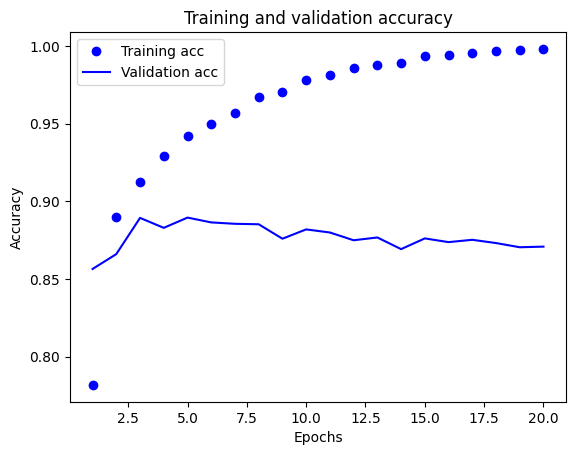

In [44]:
# using mse loss
model = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=13,
                    batch_size=512,
                    validation_data=(x_val, y_val))

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Epoch 1/20
30/30 [==============================] - 3s 59ms/step - loss: 0.5099 - accuracy: 0.7685 - val_loss: 0.3299 - val_accuracy: 0.8674
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2845 - accuracy: 0.8868 - val_loss: 0.2740 - val_accuracy: 0.8878
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2199 - accuracy: 0.9113 - val_loss: 0.2866 - val_accuracy: 0.8835
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1724 - accuracy: 0.9341 - val_loss: 0.2904 - val_accuracy: 0.8872
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1643 - accuracy: 0.9376 - val_loss: 0.3054 - val_accuracy: 0.8842
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1259 - accuracy: 0.9515 - val_loss: 0.3320 - val_accuracy: 0.8792
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1202 - accuracy: 0.9553 - val_loss: 0.3589 - val_accuracy: 0.8692
Epoch 8/20
30

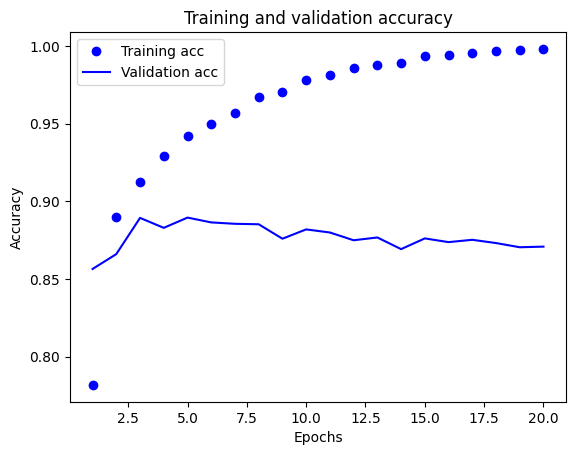

In [45]:
# using tanh activation
model = keras.Sequential([
    layers.Dense(128, activation="tanh"),
    layers.Dense(64, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Epoch 1/20
30/30 [==============================] - 5s 96ms/step - loss: 0.1721 - accuracy: 0.7425 - val_loss: 0.1227 - val_accuracy: 0.8310
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0958 - accuracy: 0.8745 - val_loss: 0.0874 - val_accuracy: 0.8844
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0719 - accuracy: 0.9045 - val_loss: 0.0839 - val_accuracy: 0.8866
Epoch 4/20
30/30 [==============================] - 1s 43ms/step - loss: 0.0627 - accuracy: 0.9175 - val_loss: 0.0868 - val_accuracy: 0.8823
Epoch 5/20
30/30 [==============================] - 1s 45ms/step - loss: 0.0568 - accuracy: 0.9262 - val_loss: 0.0850 - val_accuracy: 0.8840
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0464 - accuracy: 0.9421 - val_loss: 0.1357 - val_accuracy: 0.8240
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0433 - accuracy: 0.9455 - val_loss: 0.0996 - val_accuracy: 0.8695
Epoch 8/20
30

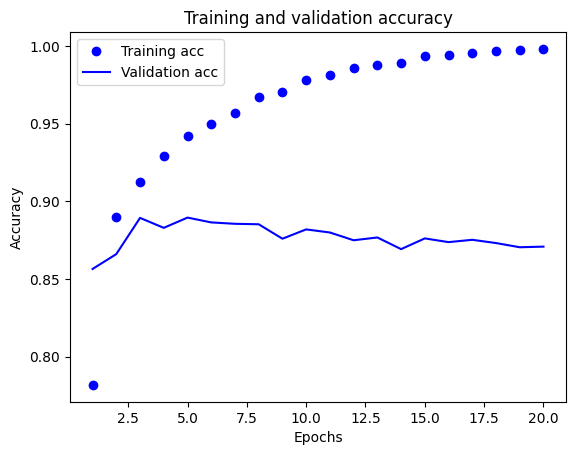

In [46]:
# using tanh activation
model = keras.Sequential([
    layers.Dense(128, activation="tanh"),
    layers.Dense(64, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Classifying newswires: A multiclass classification example

### The Reuters dataset

**Loading the Reuters dataset**

In [77]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [78]:
len(train_data)

8982

In [79]:
len(test_data)

2246

In [80]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [81]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

In [82]:
train_labels[10]

3

### Preparing the data

**Encoding the input data**

In [83]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

In [102]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [103]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

**Model definition**

In [86]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [87]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [88]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [89]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 36ms/step - loss: 2.6813 - accuracy: 0.4820 - val_loss: 1.7936 - val_accuracy: 0.6200
Epoch 2/20
16/16 [==============================] - 0s 18ms/step - loss: 1.5158 - accuracy: 0.6775 - val_loss: 1.3654 - val_accuracy: 0.6830
Epoch 3/20
16/16 [==============================] - 0s 22ms/step - loss: 1.1701 - accuracy: 0.7399 - val_loss: 1.1896 - val_accuracy: 0.7270
Epoch 4/20
16/16 [==============================] - 0s 17ms/step - loss: 0.9553 - accuracy: 0.7870 - val_loss: 1.0762 - val_accuracy: 0.7650
Epoch 5/20
16/16 [==============================] - 0s 17ms/step - loss: 0.7840 - accuracy: 0.8276 - val_loss: 0.9953 - val_accuracy: 0.7820
Epoch 6/20
16/16 [==============================] - 0s 21ms/step - loss: 0.6505 - accuracy: 0.8599 - val_loss: 0.9591 - val_accuracy: 0.7820
Epoch 7/20
16/16 [==============================] - 0s 17ms/step - loss: 0.5432 - accuracy: 0.8845 - val_loss: 0.9222 - val_accuracy: 0.7960
Epoch 8/20
16

**Plotting the training and validation loss**

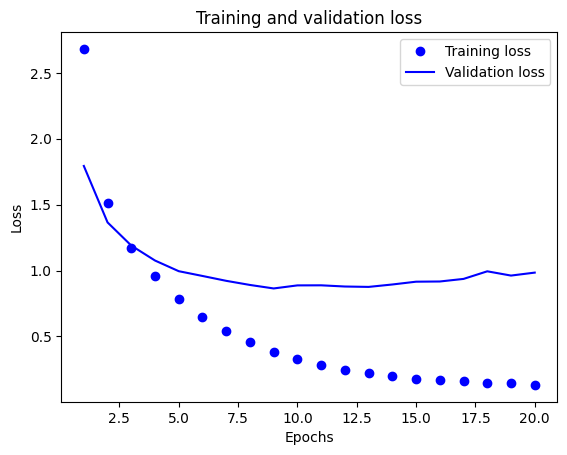

In [90]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

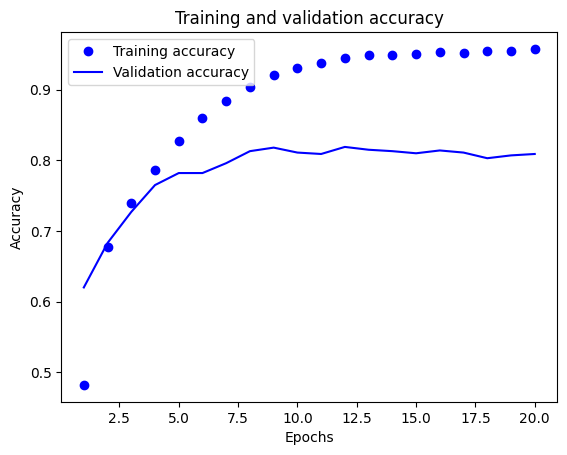

In [91]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [92]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 2s 22ms/step - loss: 2.6560 - accuracy: 0.5071
Epoch 2/9
18/18 [==============================] - 0s 17ms/step - loss: 1.4860 - accuracy: 0.6815
Epoch 3/9
18/18 [==============================] - 0s 15ms/step - loss: 1.1414 - accuracy: 0.7532
Epoch 4/9
18/18 [==============================] - 0s 15ms/step - loss: 0.9301 - accuracy: 0.8028
Epoch 5/9
18/18 [==============================] - 0s 15ms/step - loss: 0.7669 - accuracy: 0.8351
Epoch 6/9
18/18 [==============================] - 0s 14ms/step - loss: 0.6401 - accuracy: 0.8587
Epoch 7/9
18/18 [==============================] - 0s 14ms/step - loss: 0.5345 - accuracy: 0.8844
Epoch 8/9
18/18 [==============================] - 0s 14ms/step - loss: 0.4504 - accuracy: 0.9008
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9032 - accuracy: 0.7934


In [93]:
results

[0.9031559824943542, 0.7934104800224304]

In [94]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.18121104185218165

### Generating predictions on new data

In [95]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 3ms/step


In [96]:
predictions[0].shape

(46,)

In [97]:
np.sum(predictions[0])

1.0

In [98]:
np.argmax(predictions[0])

3

### A different way to handle the labels and the loss

In [99]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [100]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [101]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 10ms/step - loss: 2.8377 - accuracy: 0.4549 - val_loss: 2.2032 - val_accuracy: 0.5320
Epoch 2/20
63/63 [==============================] - 0s 7ms/step - loss: 1.9596 - accuracy: 0.5412 - val_loss: 1.7680 - val_accuracy: 0.5530
Epoch 3/20
63/63 [==============================] - 0s 6ms/step - loss: 1.6860 - accuracy: 0.5549 - val_loss: 1.6175 - val_accuracy: 0.5680
Epoch 4/20
63/63 [==============================] - 0s 7ms/step - loss: 1.5064 - accuracy: 0.5767 - val_loss: 1.5192 - val_accuracy: 0.6090
Epoch 5/20
63/63 [==============================] - 0s 7ms/step - loss: 1.3641 - accuracy: 0.6237 - val_loss: 1.4548 - val_accuracy: 0.6340
Epoch 6/20
63/63 [==============================] - 1s 9ms/step - loss: 1.2584 - accuracy: 0.6582 - val_loss: 1.4123 - val_accuracy: 0.6400
Epoch 7/20
63/63 [==============================] - 1s 10ms/step - loss: 1.1743 - accuracy: 0.6823 - val_loss: 1.3962 - val_accuracy: 0.6550
Epoch 8/20
63/63 [

### Further experiments

Epoch 1/9
18/18 [==============================] - 2s 37ms/step - loss: 2.0787 - accuracy: 0.5789 - val_loss: 1.2873 - val_accuracy: 0.7060
Epoch 2/9
18/18 [==============================] - 0s 23ms/step - loss: 1.1285 - accuracy: 0.7449 - val_loss: 0.8167 - val_accuracy: 0.8250
Epoch 3/9
18/18 [==============================] - 0s 22ms/step - loss: 0.8095 - accuracy: 0.8177 - val_loss: 0.5981 - val_accuracy: 0.8780
Epoch 4/9
18/18 [==============================] - 0s 25ms/step - loss: 0.6186 - accuracy: 0.8616 - val_loss: 0.4353 - val_accuracy: 0.9130
Epoch 5/9
18/18 [==============================] - 0s 23ms/step - loss: 0.4544 - accuracy: 0.9040 - val_loss: 0.3380 - val_accuracy: 0.9310
Epoch 6/9
18/18 [==============================] - 0s 22ms/step - loss: 0.3694 - accuracy: 0.9178 - val_loss: 0.2771 - val_accuracy: 0.9470
Epoch 7/9
18/18 [==============================] - 0s 21ms/step - loss: 0.2972 - accuracy: 0.9334 - val_loss: 0.2239 - val_accuracy: 0.9540
Epoch 8/9
18/18 [===

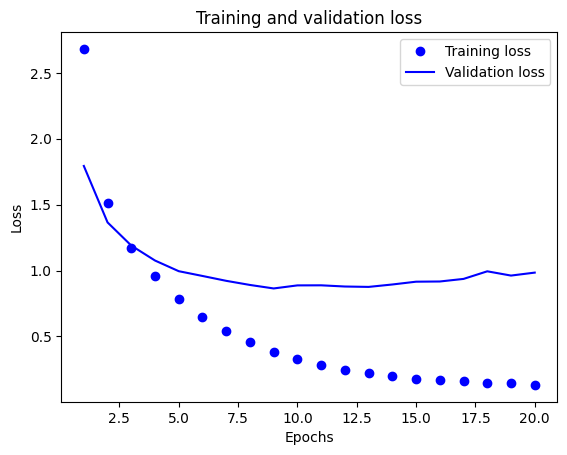

In [104]:
## larger layers

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
  layers.Dense(256, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])


x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]


model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Epoch 1/9
18/18 [==============================] - 2s 33ms/step - loss: 3.4848 - accuracy: 0.0793 - val_loss: 3.1318 - val_accuracy: 0.2500
Epoch 2/9
18/18 [==============================] - 0s 26ms/step - loss: 2.8966 - accuracy: 0.2816 - val_loss: 2.5642 - val_accuracy: 0.4840
Epoch 3/9
18/18 [==============================] - 0s 25ms/step - loss: 2.3572 - accuracy: 0.5724 - val_loss: 2.0746 - val_accuracy: 0.5950
Epoch 4/9
18/18 [==============================] - 0s 22ms/step - loss: 1.9337 - accuracy: 0.5892 - val_loss: 1.7389 - val_accuracy: 0.5960
Epoch 5/9
18/18 [==============================] - 0s 26ms/step - loss: 1.6614 - accuracy: 0.5955 - val_loss: 1.5223 - val_accuracy: 0.6100
Epoch 6/9
18/18 [==============================] - 0s 25ms/step - loss: 1.4839 - accuracy: 0.6217 - val_loss: 1.3746 - val_accuracy: 0.6450
Epoch 7/9
18/18 [==============================] - 0s 17ms/step - loss: 1.3533 - accuracy: 0.6472 - val_loss: 1.2649 - val_accuracy: 0.6580
Epoch 8/9
18/18 [===

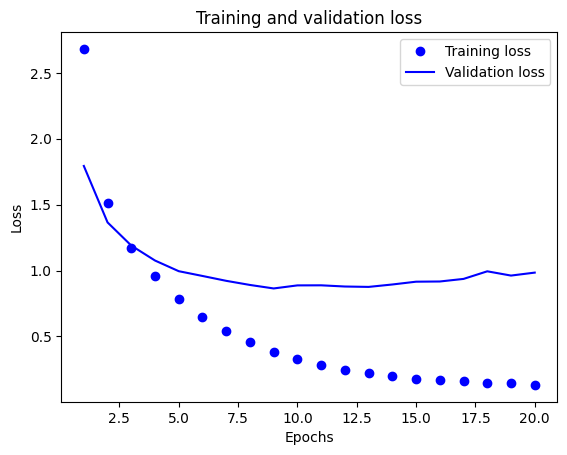

In [105]:
## smaller layers

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
  layers.Dense(32, activation="relu"),
  layers.Dense(8, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])


x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]


model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Epoch 1/9
18/18 [==============================] - 1s 33ms/step - loss: 2.5781 - accuracy: 0.5539 - val_loss: 1.7341 - val_accuracy: 0.6540
Epoch 2/9
18/18 [==============================] - 0s 19ms/step - loss: 1.5002 - accuracy: 0.7016 - val_loss: 1.1834 - val_accuracy: 0.7590
Epoch 3/9
18/18 [==============================] - 0s 19ms/step - loss: 1.1185 - accuracy: 0.7694 - val_loss: 0.9164 - val_accuracy: 0.8320
Epoch 4/9
18/18 [==============================] - 0s 19ms/step - loss: 0.9020 - accuracy: 0.8163 - val_loss: 0.7431 - val_accuracy: 0.8600
Epoch 5/9
18/18 [==============================] - 0s 16ms/step - loss: 0.7501 - accuracy: 0.8481 - val_loss: 0.6154 - val_accuracy: 0.8800
Epoch 6/9
18/18 [==============================] - 0s 20ms/step - loss: 0.6343 - accuracy: 0.8710 - val_loss: 0.5186 - val_accuracy: 0.9050
Epoch 7/9
18/18 [==============================] - 0s 18ms/step - loss: 0.5400 - accuracy: 0.8933 - val_loss: 0.4381 - val_accuracy: 0.9140
Epoch 8/9
18/18 [===

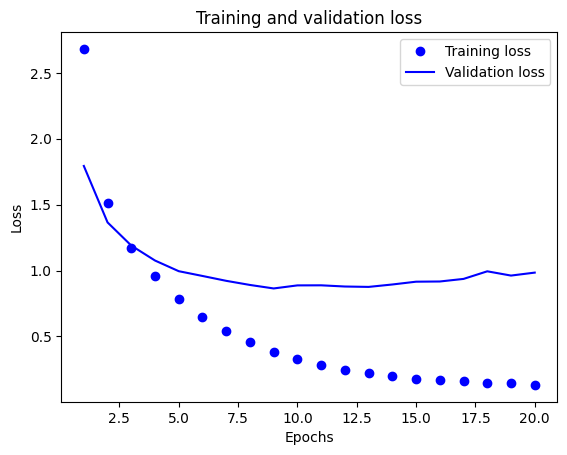

In [106]:
# single layer
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])


x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]


model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Epoch 1/9
18/18 [==============================] - 2s 30ms/step - loss: 2.5517 - accuracy: 0.4825 - val_loss: 1.5834 - val_accuracy: 0.6120
Epoch 2/9
18/18 [==============================] - 0s 17ms/step - loss: 1.4374 - accuracy: 0.6761 - val_loss: 1.2257 - val_accuracy: 0.7240
Epoch 3/9
18/18 [==============================] - 0s 19ms/step - loss: 1.1327 - accuracy: 0.7455 - val_loss: 0.9373 - val_accuracy: 0.7980
Epoch 4/9
18/18 [==============================] - 0s 19ms/step - loss: 0.9232 - accuracy: 0.7967 - val_loss: 0.7646 - val_accuracy: 0.8290
Epoch 5/9
18/18 [==============================] - 0s 20ms/step - loss: 0.7529 - accuracy: 0.8277 - val_loss: 0.5929 - val_accuracy: 0.8720
Epoch 6/9
18/18 [==============================] - 0s 20ms/step - loss: 0.6216 - accuracy: 0.8626 - val_loss: 0.4842 - val_accuracy: 0.8980
Epoch 7/9
18/18 [==============================] - 0s 17ms/step - loss: 0.5200 - accuracy: 0.8843 - val_loss: 0.4320 - val_accuracy: 0.9110
Epoch 8/9
18/18 [===

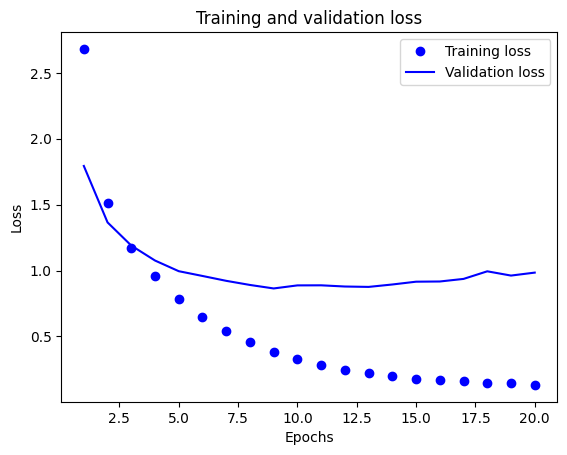

In [108]:
# three layer

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])


x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]


model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Wrapping up

## Predicting house prices: A regression example

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [109]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [110]:
train_data.shape

(404, 13)

In [111]:
test_data.shape

(102, 13)

In [ ]:
train_targets

### Preparing the data

**Normalizing the data**

In [113]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your model

**Model definition**

In [125]:
#more layers and varying the number of units per layer

def build_model():
    model = keras.Sequential([
        layers.Dense(128, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(32, activation="relu"),
        layers.Dense(8, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation

**K-fold validation**

In [126]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [127]:
all_scores

[2.1171698570251465, 2.457984209060669, 2.487133741378784, 2.3203964233398438]

In [128]:
np.mean(all_scores)

2.345671057701111

**Saving the validation logs at each fold**

In [154]:
num_epochs = 20
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


**Building the history of successive mean K-fold validation scores**

In [155]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

**Plotting validation scores**

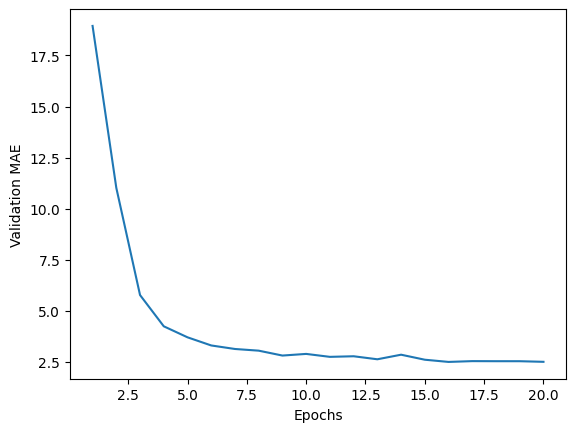

In [156]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

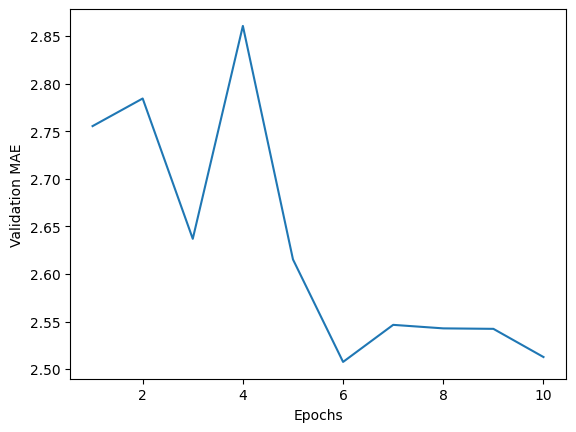

In [157]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Training the final model**

In [151]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 5ms/step - loss: 15.4229 - mae: 2.4408


In [152]:
test_mae_score

2.4407942295074463

### Generating predictions on new data

In [153]:
predictions = model.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 3ms/step


array([8.609215], dtype=float32)

### Wrapping up

## Summary